# MNIST Softmax Estimation

Note: This notebook is desinged to run with Python3 and CPU (no GPU) runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_cpu.png)

This notebook uses TensorFlow2.x.

In [8]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


####[MSE-01]
Import modules.

In [9]:
import os, random
os.environ['PYTHONHASHSEED'] = str(20230515)
os.environ['TF_USE_LEGACY_KERAS'] = '1'
random.seed(20230515)

import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

np.random.seed(20190825)
tf.random.set_seed(20190825)

####[MSE-02]
Download the MNIST dataset and store into NumPy arrays.

In [10]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

####[MSE-03]
Define a model for the softmax estimation.

In [11]:
model = models.Sequential()
model.add(layers.Dense(10, activation='softmax', input_shape=(28*28,),
                       name='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 softmax (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


####[MSE-04]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

####[MSE-05]
Train the model. It acheves around 92% accuracy for the test dataset.

In [13]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.6776 - acc: 0.8321 - val_loss: 0.3868 - val_acc: 0.9012
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3638 - acc: 0.9018 - val_loss: 0.3226 - val_acc: 0.9120
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3207 - acc: 0.9117 - val_loss: 0.2985 - val_acc: 0.9168
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3002 - acc: 0.9169 - val_loss: 0.2868 - val_acc: 0.9210
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2882 - acc: 0.9204 - val_loss: 0.2783 - val_acc: 0.9243
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2799 - acc: 0.9222 - val_loss: 0.2748 - val_acc: 0.9238
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2737 - acc: 0.9237 - val_loss: 0.2710 - val_acc: 0.9240
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.

####[MSE-06]
Show examples of the prediction result. Three for correct preditions and three for incorrect predictions.

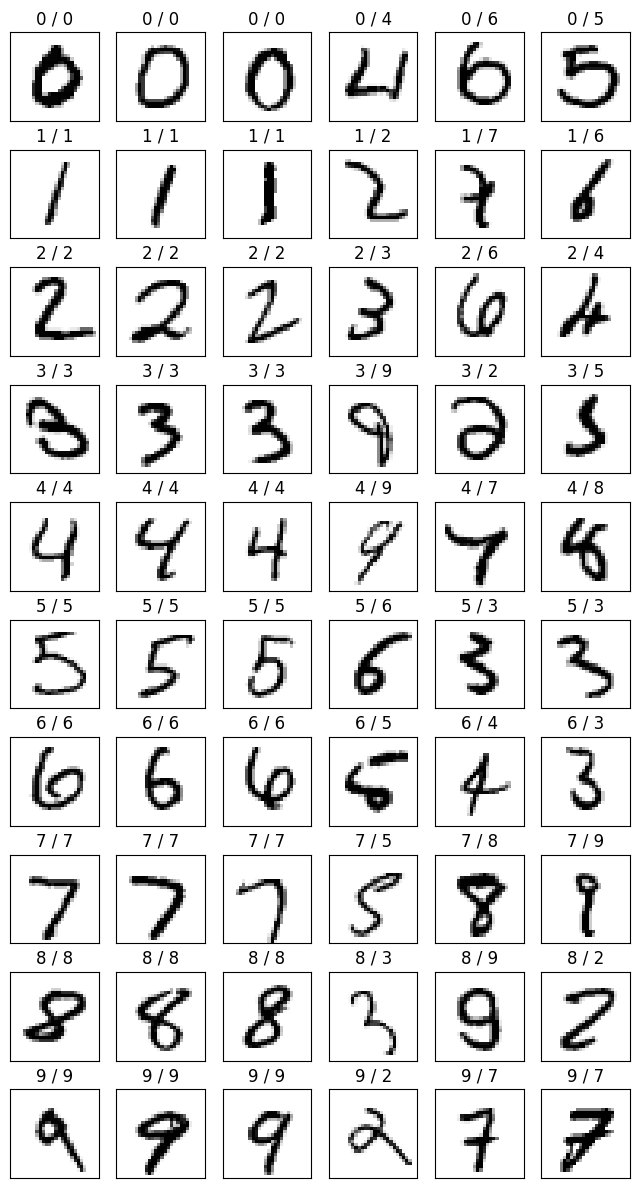

In [14]:
p_val = model.predict(np.array(test_images), verbose=0)
df = DataFrame({'pred': list(map(np.argmax, p_val)),
                'label': list(map(np.argmax, test_labels))})
correct = df[df['pred']==df['label']]
incorrect = df[df['pred']!=df['label']]

fig = plt.figure(figsize=(8, 15))
for i in range(10):
    indices = list(correct[correct['pred']==i].index[:3]) \
                + list(incorrect[incorrect['pred']==i].index[:3])
    for c, image in enumerate(test_images[indices]):
        subplot = fig.add_subplot(10, 6, i*6+c+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('%d / %d' % (i, df['label'][indices[c]]))
        subplot.imshow(image.reshape((28, 28)),
                       vmin=0, vmax=1, cmap=plt.cm.gray_r)